<u>Note:</u>
Read This Before Anything!

# <u>Development Plan:</u>

### Unit testing – `MPC.ipynb`, `state_estimation.ipynb`, `system_dynamics.ipynb`
We will write, test this whole code in small sections from scratch. Writing things from scratch is hard. A notebook is perfect for this kind of development due to the agility of working with cells. 

### Integrated Testing - `MPC.ipynb`
Eventually all the working pieces of the code will be transfered to the MPC.ipynb and integrated into classes and objects. This is still not the final version of the libraries.

This is a hard to do project. Communicate about your contributions with the team regularly or do not contribute! It's quite easy to mess up weeks worth of work of the whole team.

In [6]:
import numpy as np

In [ ]:
#formulate original state space equation
class ModelPredictiveControl(object):
    def __init__(self, A, B, C, f, v, W3, W4, x0, total):
        self.A=A
        self.B=B
        self.C=C
        self.f=f
        self.v=v
        self.W3=W3
        self.W4=W4
        self.total=total
# State-space dimensions
        n_states = 10  # [x, y, z, vx, vy, vz, ax, ay, az, m]
        n_controls = 2  # [T1, T2]

        self.X = np.zeros((n_states, 1))
        self.U = np.zeros((n_controls, 1))

        self.A = np.zeros((n_states, n_states))
        self.B = np.zeros((n_states, n_controls))

        self.Xnew = np.dot(A, X) + np.dot(B, U)

    def formLiftedMatrices(self):
        #f is prediction horizon
        #v is control horizon

        f=self.f
        v=self.v
        r=self.r
        n=self.n
        m=self.m
        A=self.A
        B=self.B
        C=self.C
        
        O=np.zeros(shape=(f*r,n))

        #what is r?
        #lifted matrix with C* A^i wrt prediction horizon
        for i in range(f):
            if (i==0):
                powA=A
            else:
                powA=np.matmul(powA,A)
            O[i*r:(i+1)*r,:]=np.matmul(C,powA)
            #dimensions of blocks of A are rows of CA which is rxn dim, 
            #lifted matrix of O at row index i*r to i+1*r
        
        #lifted matrix M for U
        M=np.zeros(shape=(f*r,v*m))
        #inputs: control horizon, dim of u?

        for i in range(f):
            if (i<v):
                for j in range(i+1):
                    if (j==0):
                        powA = np.eye(n,n)
                    else:
                        powA=np.matmul(powA,A)
                    M[i*r:(i+1)*r,(i-j)*m:(i-j+1)*m]=np.matmul(C,np.matmul(powA,B))
            else:
                    for j in range(v):
                        # here we form the last entry
                        if j==0:
                            sumLast=np.zeros(shape=(n,n))
                            for s in range(i-v+2):
                                if (s == 0):
                                    powA=np.eye(n,n)
                                else:
                                    powA=np.matmul(powA,A)
                                sumLast=sumLast+powA
                            M[i*r:(i+1)*r,(v-1)*m:(v)*m]=np.matmul(C,np.matmul(sumLast,B))
                        else:
                            powA=np.matmul(powA,A)
                            M[i*r:(i+1)*r,(v-1-j)*m:(v-j)*m]=np.matmul(C,np.matmul(powA,B))
            
            
            tmp1=np.matmul(M.T,np.matmul(self.W4,M))
            tmp2=np.linalg.inv(tmp1+self.W3)
            gainMatrix=np.matmul(tmp2,np.matmul(M.T,self.W4))
            
            
            return O,M,gainMatrix
                    #from control horizon to prediction horizon (where u becomes a constant)
                    #MUCH NEEDED dim analysis



        #v is prediction horizion, m is number of vars in U?

        #rows outputs, columns inputs


In [ ]:
# State-space dimensions
n_states = 24  # [x, y, z, vx, vy, vz, ax, ay, az, m]
n_controls = 2  # [T1, T2]

# f is prediction horizon
f=90
# v is control horizon
v=60

# Assume a control experiment which starts from: 0 seconds, ends at: 30 seconds
t_0 = 0
t_n = 30*60
dt = 1/60

# TODO: Model a trajectory, and Z_d must be the closest 
#|_d = "will see"

# TODO: Model the system dynamics analytically and implement the A, B, and C matrices!

A=np.zeros((n_states, n_states))
B=np.zeros((n_states, n_controls))
C=np.zeros((n_states, n_states))

X = np.zeros((n_states, 1))
U = np.zeros((n_controls, 1))
A = np.zeros((n_states, n_states))
B = np.zeros((n_states, n_controls))
Xnew = np.dot(A, X) + np.dot(B, U)

#create expanded Z coefficient matrix for recursive prediction repre(in for loop form)
#model cost function of U
#model cost function of Z

# Weight Matrices for $J_u$:
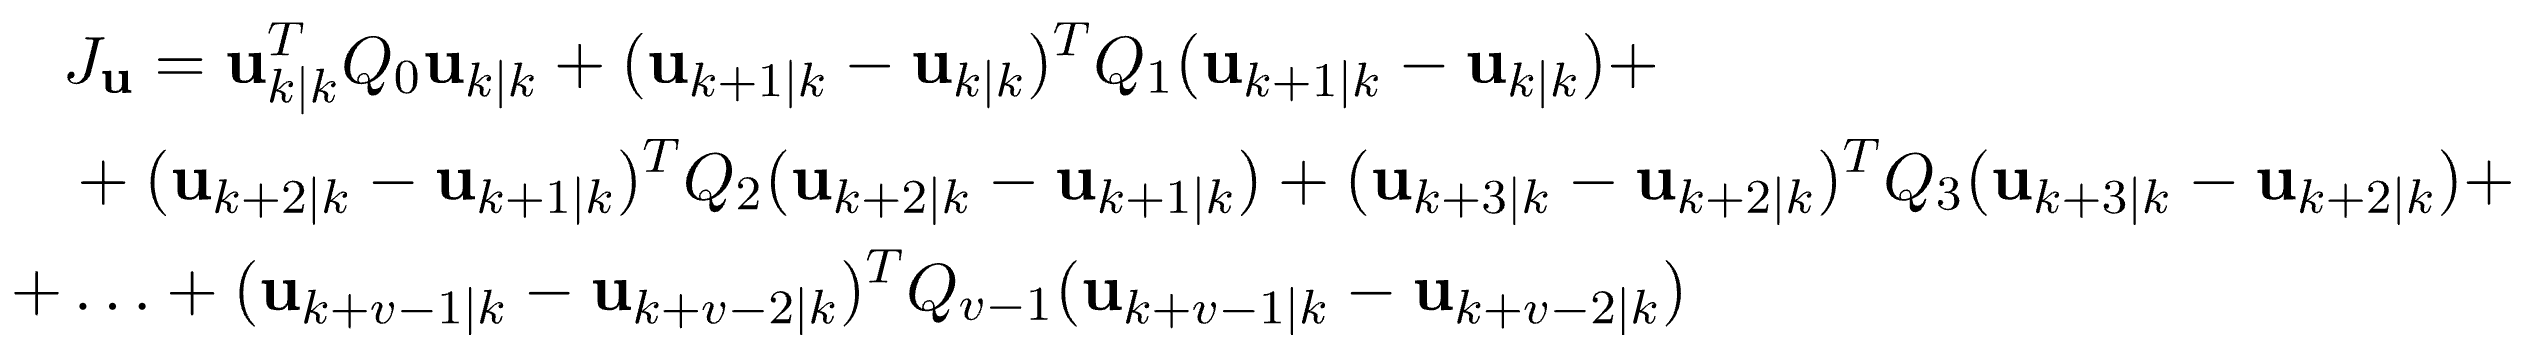
# We'll abstract away this into: $J_u = \underbar u^{T} \underbar W_{3} \underbar u$<br>
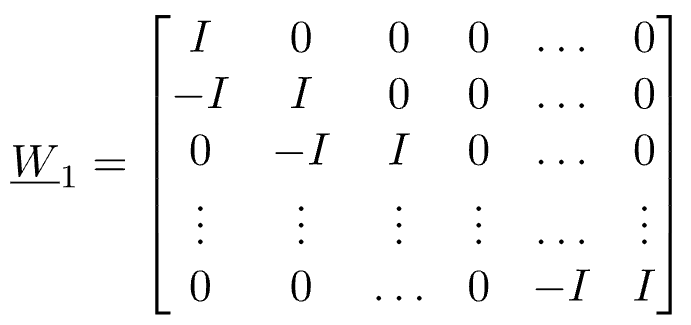
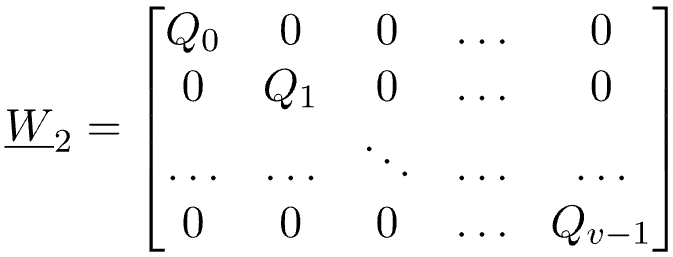
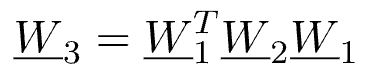

In [ ]:
type(np.zeros((1,1)))

In [ ]:
w1 = np.zeros((v,v), dtype=np.ndarray)

print(np.shape(w1))

def populate_w1(w1):
    # w1 is a square matrix of dimensions
    dim = np.shape(w1)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                w1[row,column] = I # diagonal element
            elif (row-1 == column) and (row-1 >= 0):
                w1[row,column] = -I # diagonal element
            else:
                w1[row,column] = zeros

    return w1

w1 = populate_w1(w1)
w1


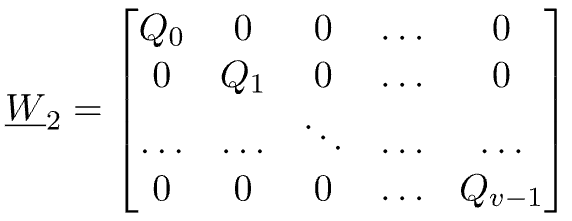

In [ ]:
w2 = np.zeros((v,v), dtype=np.ndarray)
def populate_w2(w2):
    dim = np.shape(w2)[0]
    I = np.eye(dim)
    zeros = 0
    Q_values = 0.0001 * (np.random.rand(v,v)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                Q_matrix = f"Q_{row}"
                w2[row, column] = Q_matrix
            else:
                w2[row, column] = zeros
    return w2

populate_w2(w2)

In [ ]:
w2 = np.zeros((v,v), dtype=np.ndarray)

# print(Q)
# print("\n\n\n")
# I = np.eye(v,v)
# print(np.matmul(I, Q[1]))

def populate_w2(w2):
    dim = np.shape(w2)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    Q_values = 0.0001 * (np.random.rand(dim,dim)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                Q_matrix = np.diag(Q_values[row])
                w2[row, column] = Q_matrix
            else:
                w2[row, column] = zeros
    return w2

w2 = populate_w2(w2)



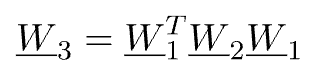

In [ ]:
w3 = np.zeros((v,v))

def populate_w3(w1,w2):
    return np.matmul(np.transpose(w1), (np.matmul(w2, w1)))

print(w3)

# For $J_z$ we have W4:
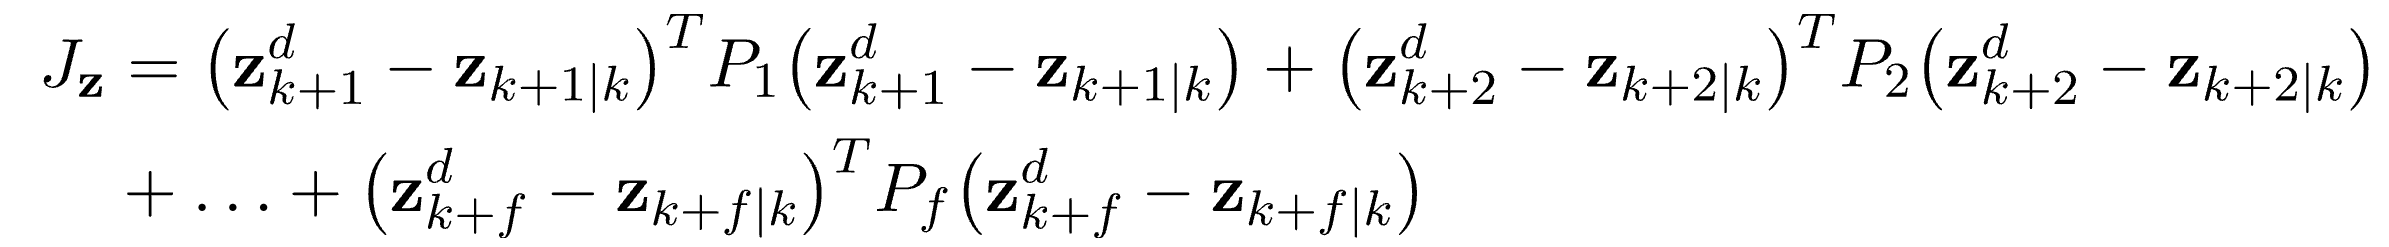
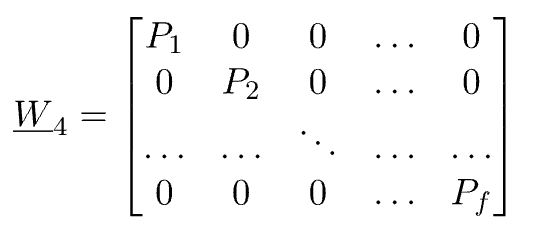

In [ ]:
w4 = np.zeros((f,f), dtype=np.ndarray)

def populate_w4(w4):
    dim = np.shape(w4)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    P_values = 0.0001 * (np.random.rand(dim,dim)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                P_matrix = np.diag(P_values[row])
                w4[row, column] = P_matrix
            else:
                w4[row, column] = zeros
    return w4




# Predicting Values in the prediction horizon, at $k^{th}$ timestep:
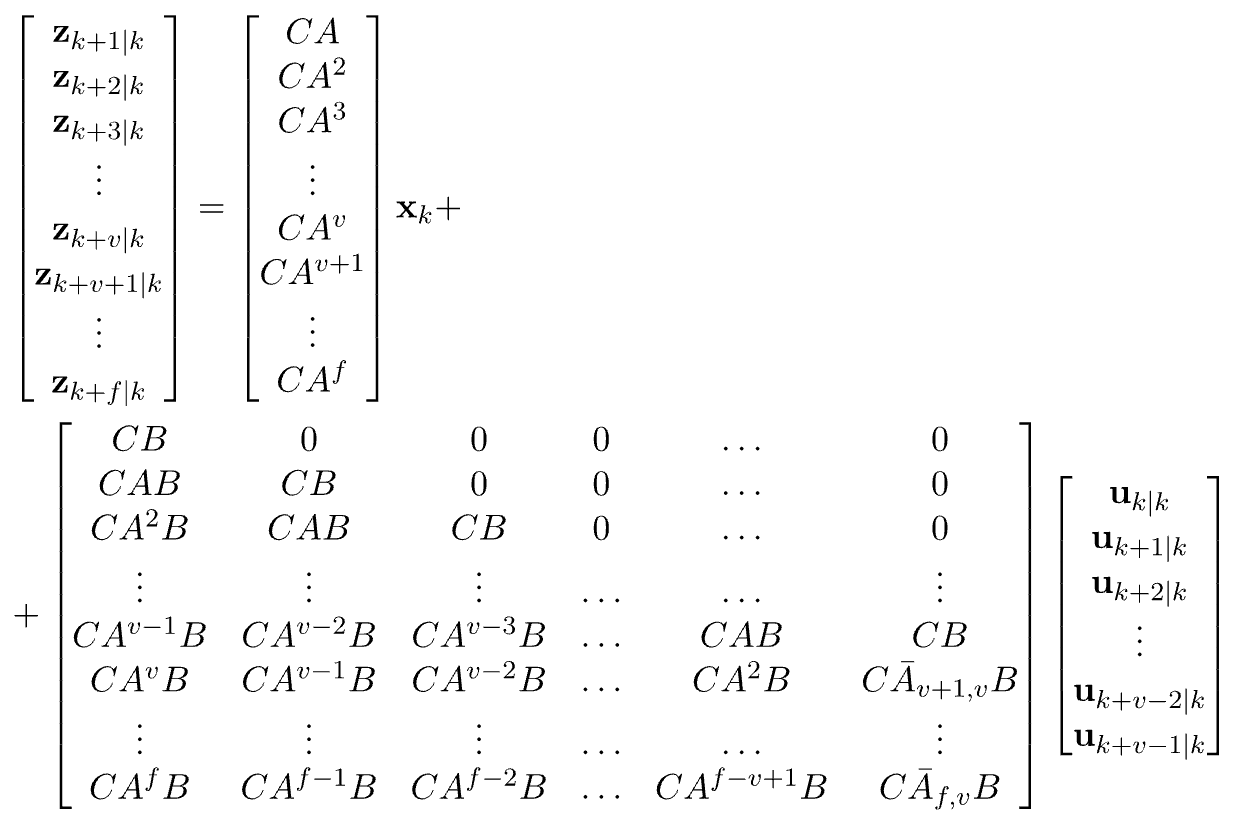

# Abstracted Away as: $\underbar z = Ox_k+ M\underbar u$

Populate $O$ matrix:

In [ ]:
def populateO(xlen,f):
    C = np.zeros((3, xlen))

    # Random A matrix
    A = np.random.rand(xlen, xlen)

    # Create O array with proper dimensions
    # Since C is 3x6, and A is xlen x xlen, the dot product C·A will be 3 x xlen
    O = np.zeros((f, 1), dtype=np.ndarray)  # f timesteps, each containing a 3 x xlen matrix

    # Fill O array
    for i in range(f):
        A_power = np.linalg.matrix_power(A, i+1)
        O[i] = np.dot(C, A_power)
    
    return O

Populate $M$ Matrix:

In [ ]:
def A_bar(A, f, v):
    temp = np.power(A, 0)
    Abar_list = []
    for i in range(0,f-v+1):
        temp = temp @ A
        Abar = A_bar + temp
        Abar_list.append(Abar)
    return Abar

def populate_M(C,A,B,v,f,ulen):
    M = np.zeros((f+1, v), dtype=np.ndarray)
    M_test = np.zeros((f+1, v), dtype=np.ndarray)
    Abar_list = A_bar(A, f, v)

    # part1:
    for row in range(0,v): 
        for column in range(0,v):
            if row >= column:
                A_exponent = row - column
                M[row][column] = C @ np.power(A, A_exponent) @ B

    # part2:
    for row in range(v, f+1):
        for column in range(0, v-1): # we're not going on the last column here
            A_exponent = row - column
            M[row][column] = C @ np.power(A, A_exponent) @ B
        # Last element in the column:
        M[row][v-1] = C @ Abar_list[row-v] @ B

    return M


Testing the loops:

In [27]:
f = 10
v = 5
M = np.zeros((f+1, v), dtype=np.ndarray)
M_test = np.zeros((f+1, v), dtype=object)

# part1:
for row in range(0,v): 
    for column in range(0,v):
        if row >= column:
            A_exponent = row - column
            # M[row][column] = f"{A_exponent}" IDK WHY TF IS THIS NOT FUCKING PRINTING
            print(A_exponent, end = "")
            M[row][column] = C @ np.power(A, A_exponent) @ B
    print()
print(M_test)

0
10
210
3210
43210
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


# Final Step:
Use the analytical result of the optimization equation to calculate u underbar:
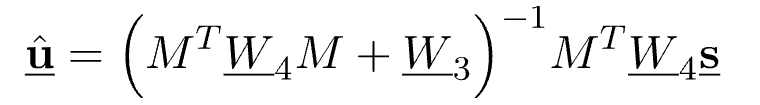